# **Taller: Construcción de índices estadísticos mediante Análisis de Componentes Principales (PCA).**

Facultad de Ciencias Marinas, Universidad Autónoma de Baja California,  9 de abril, 2025

  ## **Actividad: Análisis de Planeación Territorial con PCA**

  **Instructor: Dr. Andrés García Medina**

  **email: andgarm.n@gmail.com**

  **sitio: https://sites.google.com/view/andresgm/home**

#### Importamos librerias

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Suponiendo que los datos estan en un csv

In [9]:
datos_ordenamiento = pd.read_csv('datos_ejemplo.csv')
datos_ordenamiento.head()

,id,latitud,longitud,accesibilidad,distancia_a_area_residencial,distancia_a_servicios,distancia_a_area_ambiental
0,1,19.427491,-99.133881,7,4.222669,1.829919,2.017192
1,2,19.439014,-99.138605,8,3.736601,1.700077,8.957636
2,3,19.434640,-99.137079,3,2.698461,0.898901,4.753702
3,4,19.431973,-99.136336,1,2.933756,0.190820,5.632756
4,5,19.423120,-99.135439,4,4.826277,0.741637,6.955161


#### Vamos a invertir la distancia para interpretabilidad del índice (no es parte de PCA)

In [12]:
datos_ordenamiento['score_a_area_residencial'] =  \
1 / datos_ordenamiento['distancia_a_area_residencial']

datos_ordenamiento['score_a_servicios'] = \
1 / datos_ordenamiento['distancia_a_servicios']

datos_ordenamiento['score_a_area_ambiental'] = \
1 / datos_ordenamiento['distancia_a_area_ambiental']

#### Normalizamos los datos (centrado y escalado)

In [15]:
# Seleccionar las variables de interes
variables = ['accesibilidad', 'score_a_area_residencial',\
'score_a_servicios', 'score_a_area_ambiental']
scaler = StandardScaler()
df_normalized = scaler.fit_transform(datos_ordenamiento[variables])
df_normalized = pd.DataFrame(df_normalized, columns=variables)
df_normalized.head()

,accesibilidad,score_a_area_residencial,score_a_servicios,score_a_area_ambiental
0,0.786476,-0.390833,-0.537397,0.948084
1,1.189797,-0.382983,-0.521849,-0.782788
2,-0.826808,-0.356747,-0.326548,-0.337902
3,-1.633450,-0.364321,1.211265,-0.485840
4,-0.423487,-0.398381,-0.238669,-0.637949


#### Matriz de correlación y mapa de calor

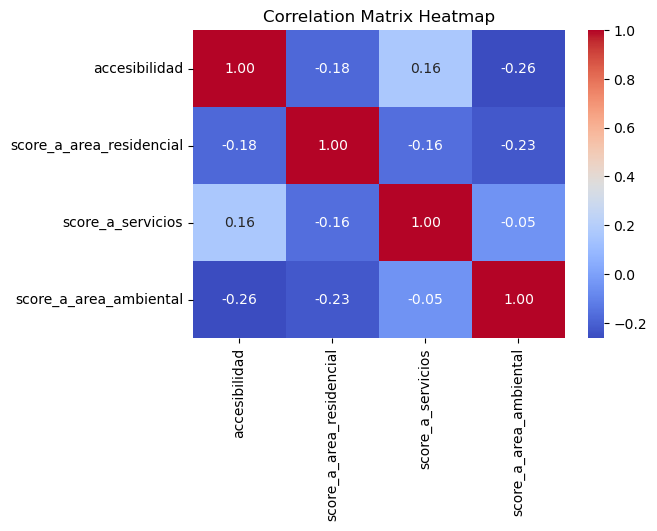

In [18]:
import seaborn as sns

correlation_matrix = df_normalized.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Aplicar PCA

In [21]:
pca = PCA(n_components=1)
df_normalized['indice_idoneidad']  = pca.fit_transform(df_normalized)
df_normalized['indice_idoneidad']

0     0.082930
1     0.938188
2    -0.490315
3    -0.170664
4    -0.053282
5    -1.593094
6     0.845889
7    -0.259905
8    -1.128175
9    -0.747522
10    0.427888
11   -0.247409
12    0.345797
13   -2.103419
14   -0.818505
15   -1.144596
16    3.111178
17    0.161886
18    1.802216
19    1.040915
Name: indice_idoneidad, dtype: float64

#### Escalamos el indice entre 0 y 1 (no es parte de PCA)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized['indice_idoneidad_escalado'] = \
scaler.fit_transform(df_normalized[['indice_idoneidad']])

df_normalized['indice_idoneidad_escalado']

0     0.419275
1     0.583287
2     0.309344
3     0.370643
4     0.393153
5     0.097865
6     0.565587
7     0.353529
8     0.187022
9     0.260019
10    0.485427
11    0.355926
12    0.469685
13    0.000000
14    0.246407
15    0.183873
16    1.000000
17    0.434416
18    0.748981
19    0.602987
Name: indice_idoneidad_escalado, dtype: float64

#### Con base en este indice podemos asignar el uso de suelo

In [27]:
# Asignar uso del suelo
def asignar_uso(indice):
    # Convert 'indice' to a float before comparison
    indice = float(indice)
    if indice >= 0.7:
        return 'Residencial'
    elif indice >= 0.4:
        return 'Comercial'
    else:
        return 'Industrial'

#### Añadimos el indice a los datos orignales

In [30]:
datos_ordenamiento['indice'] = \
df_normalized['indice_idoneidad_escalado']

#### Aplicamos el criterio de uso de suelo

In [33]:
datos_ordenamiento['uso_suelo'] = \
datos_ordenamiento['indice'].apply(asignar_uso)

#### Desplegamos la categorización

In [36]:
datos_ordenamiento[['id','latitud','longitud','indice','uso_suelo']]

,id,latitud,longitud,indice,uso_suelo
0,1,19.427491,-99.133881,0.419275,Comercial
1,2,19.439014,-99.138605,0.583287,Comercial
2,3,19.434640,-99.137079,0.309344,Industrial
3,4,19.431973,-99.136336,0.370643,Industrial
4,5,19.423120,-99.135439,0.393153,Industrial
5,6,19.423120,-99.132148,0.097865,Industrial
6,7,19.421162,-99.138003,0.565587,Comercial
7,8,19.437324,-99.134858,0.353529,Industrial
8,9,19.432022,-99.134076,0.187022,Industrial
9,10,19.434161,-99.139535,0.260019,Industrial


#### Siempre es útil una visualización

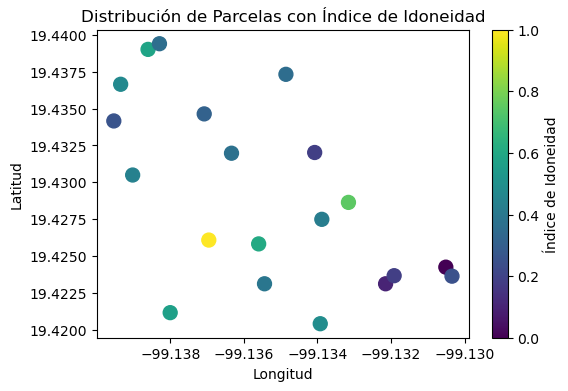

In [39]:
# Visualización
plt.figure(figsize=(6, 4))
plt.scatter(datos_ordenamiento['longitud'],
            datos_ordenamiento['latitud'], 
            c=datos_ordenamiento['indice'], 
            cmap='viridis', s=100)
plt.colorbar(label='Índice de Idoneidad')
plt.title('Distribución de Parcelas con Índice de Idoneidad')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.savefig('scatter_plot_pca.png')
plt.show()

#### **Apendice: Construcción del índice**

#### Desplegamos los pesos que se obtienen con PCA para la combinación lineal (óptima) de las variables

In [43]:
loadings = pca.components_.flatten()


weights_df = pd.DataFrame({'Feature': variables, 'Weight': loadings})

weights_df

,Feature,Weight
0,accesibilidad,0.681653
1,score_a_area_residencial,-0.377340
2,score_a_servicios,0.531596
3,score_a_area_ambiental,-0.332220


#### Graficamos la importancia de cada peso

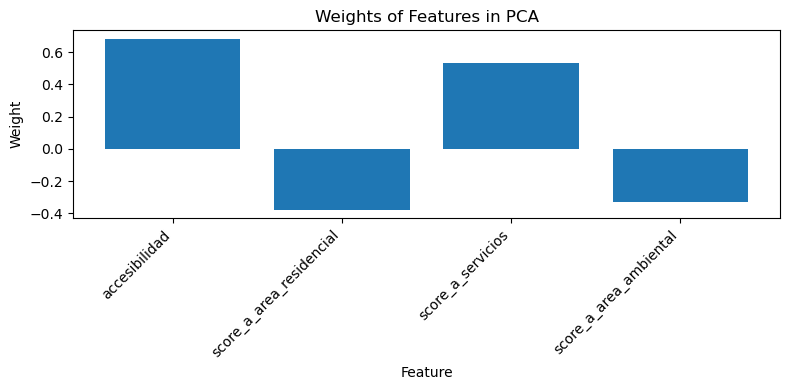

In [46]:
loadings = pca.components_.flatten()
variables = ['accesibilidad', 'score_a_area_residencial', \
             'score_a_servicios', 'score_a_area_ambiental']

weights_df = pd.DataFrame({'Feature': variables, 'Weight': loadings})

plt.figure(figsize=(8, 4))
plt.bar(weights_df['Feature'], weights_df['Weight'])
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Weights of Features in PCA')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Corroboramos que el índice coincida con lo calculado

In [49]:
indice_manual = np.dot(df_normalized[variables], weights_df['Weight'])
indice_manual_df = pd.DataFrame({'indice_manual': indice_manual})


comparison_df = pd.DataFrame(
    {'PCA_Index': df_normalized['indice_idoneidad'],
    'Manual_Index': indice_manual_df['indice_manual']})


comparison_df

,PCA_Index,Manual_Index
0,0.082930,0.082930
1,0.938188,0.938188
2,-0.490315,-0.490315
3,-0.170664,-0.170664
4,-0.053282,-0.053282
5,-1.593094,-1.593094
6,0.845889,0.845889
7,-0.259905,-0.259905
8,-1.128175,-1.128175
9,-0.747522,-0.747522


#### Pudiera ser ilustrativo visualizar el valor de indice para cada parcela

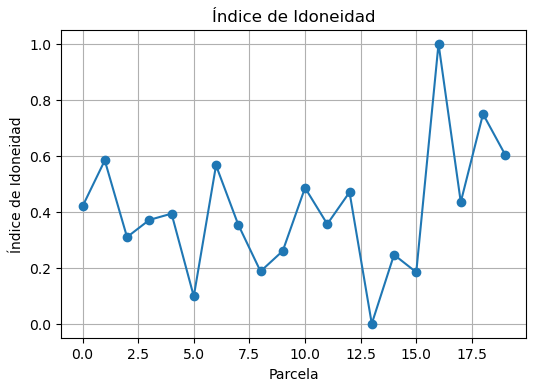

In [52]:
plt.figure(figsize=(6, 4))
plt.plot(datos_ordenamiento['indice'], marker='o', linestyle='-')
plt.xlabel('Parcela')
plt.ylabel('Índice de Idoneidad')
plt.title('Índice de Idoneidad')
plt.grid(True)
plt.savefig('indice_idoneidad.png')
plt.show()

#### Clasificamos los puntos y los dibujamos con diferente color de acuerdo al uso de suelo

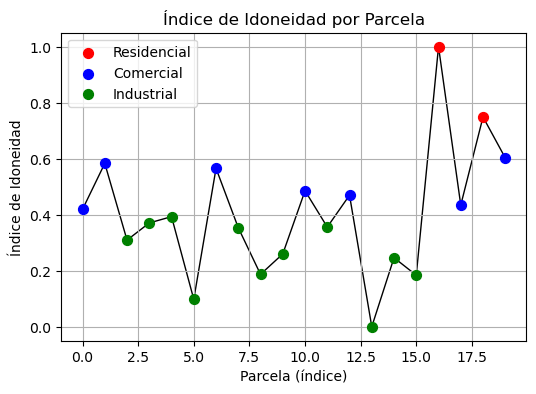

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4)) 

# Crear el gráfico con una línea negra conectando los puntos
plt.plot(datos_ordenamiento.index, datos_ordenamiento['indice'], \
         color='black', linewidth=1, zorder=1)
# zorder asegura que la línea esté por detrás de los puntos

# Gráfico de dispersión con colores basados en 'uso_suelo'
colores = {'Residencial': 'red', 'Comercial': 'blue', \
           'Industrial': 'green'}
for uso, color in colores.items():
    # Filtrar los datos para el tipo de uso de suelo específico
    subconjunto = \
    datos_ordenamiento[datos_ordenamiento['uso_suelo'] == uso]
    # Crear el gráfico de dispersión para cada subconjunto
    plt.scatter(subconjunto.index, subconjunto['indice'], \
                color=color, label=uso, s=50, zorder=2)

plt.xlabel('Parcela (índice)')
plt.ylabel('Índice de Idoneidad')
plt.title('Índice de Idoneidad por Parcela')
plt.grid(True)
plt.legend()